In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

# create "X" (features) and y(response)

X = iris.data
y = iris.target

In [3]:
#evalutaion 1 : try and test on same data

#using logistic regression
from sklearn.linear_model import LogisticRegression

#initiate the model
logreg = LogisticRegression()

#fit the model 
logreg.fit(X,y)

# make prediction for new observations
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
y_pred = logreg.predict(X)

len(y_pred)

150

In [7]:
#compute classificaiotn accuracy for logreg

from sklearn import metrics
print metrics.accuracy_score(y, y_pred)

#training accuracy

0.96


In [10]:
#KNN (K=5)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred = knn.predict(X)
print metrics.accuracy_score(y, y_pred)

0.966666666667


In [11]:
#KNN (K=1)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred = knn.predict(X)
print metrics.accuracy_score(y, y_pred)

1.0


In [13]:
#Problems with training and test error
#Goal is to estimate likely performace of a model on out-of-sample data
#We should remind that overfit lead to poor prediction
#We aim to learn the signal and a model no the noise

In [14]:
#Train/test split

In [15]:
print X.shape
print y.shape


(150, 4)
(150,)


In [21]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [22]:
print X_train.shape
print X_test.shape


(90, 4)
(60, 4)


In [23]:
print y_train.shape
print y_test.shape

(90,)
(60,)


In [27]:
#train the model
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
#make predictions on the testing set
y_pred = logreg.predict(X_test)

print metrics.accuracy_score(y_test, y_pred)

0.95


In [30]:
#KNN-5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.966666666667


In [31]:
#KNN-1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.95


In [36]:
#try K=1 through K=25 and record testing accuracy

k_range = range(1, 26)
scores =[]
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0,0.5,u'Testing Accuracy')

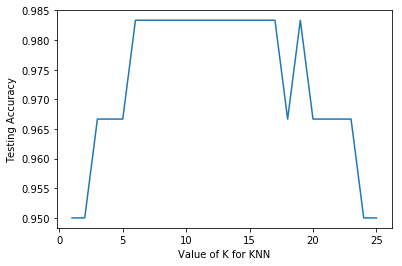

In [38]:
#import Matplotlib
import matplotlib.pyplot as plt

#plot the relationship btw K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

In [42]:
#Making prediction on out-of-sample data
#initiate the model with the best known tuning parameter
knn = KNeighborsClassifier(n_neighbors=10) #any between n=6 to n=16 in this case

#train the model 
knn.fit(X,y)

#make a prediction for any out-of-sample observation

#make predictions
import numpy as np
X_new = np.reshape([3,5,4,2],(1,-1)) #change the shape 1,4
knn.predict(X_new)

array([1])